In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [40]:
np.random.seed(10)
P, Q = (np.random.rand(i, 2) for i in (4, 5))
P_big, Q_big = (np.random.rand(i, 80) for i in (100, 120))

print(P, "\n\n", Q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [42]:
def naive(P, Q):
    """
    A naive solution for finding pairvise distances between poins in P and Q
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement a naive solution
    # ***************************************************
    
    D=np.ones((1,P.shape[0]*Q.shape[0]))  

    for i in range(P.shape[0]):
        for j in range(Q.shape[0]):
            D[0,i*Q.shape[0]+j]=np.sqrt((P[i,0]-Q[j,0])**2+(P[i,1]-Q[j,1])**2)

    print(D.shape)
    return D

test(naive)

❌ The are some issues with your implementation of `naive`:
**********************************************************************
File "__main__", line 11, in naive
Failed example:
    naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
Expected:
    array([[2.82842712, 5.65685425]])
Got:
    (1, 2)
    array([[2.82842712, 5.65685425]])
**********************************************************************


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [16]:
rows, cols = np.indices((P.shape[0], Q.shape[0]))
print(rows, end="\n\n")
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [57]:
def with_indices(P, Q):
    """
    An optimized solution using matching indices
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement an optimized solution
    # ***************************************************
    rows, cols = np.indices((P.shape[0], Q.shape[0]))

    result=np.sqrt(np.square(P[rows.ravel()]-Q[cols.ravel()]).sum(axis=1))
    
    return(result)
test(with_indices)

❌ The are some issues with your implementation of `with_indices`:
**********************************************************************
File "__main__", line 11, in with_indices
Failed example:
    with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
Expected:
    array([[2.82842712, 5.65685425]])
Got:
    array([2.82842712, 5.65685425])
**********************************************************************


In [56]:
np.square(P[rows.ravel()]-Q[cols.ravel()]).sum(axis=1)

array([0.36722477, 0.87720924, 0.83037395, 0.35190232, 0.07596501,
       0.65200778, 0.04453094, 0.45250711, 0.05060288, 0.21654589,
       0.12712231, 0.56576712, 0.32718459, 0.24900168, 0.05433945,
       0.45267882, 0.27465432, 0.09935246, 0.39958703, 0.49389096])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [61]:
from scipy.spatial.distance import cdist


def scipy_version(P, Q):
    return cdist(P, Q)

### Numpy Magic

In [64]:
def tensor_broadcasting(P, Q):
    return np.sqrt(np.sum((P[:, np.newaxis, :] - Q[np.newaxis, :, :]) ** 2, axis=2))

# Compare methods

In [65]:
methods = [
    naive,
    with_indices,
    scipy_version,
    tensor_broadcasting,
]
timers = []
for f in methods:
    r = %timeit -o f(P_big, Q_big)
    timers.append(r)

(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
(1, 12000)
96.4 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.2 ms ± 3.37 ms per loop (mean ± std

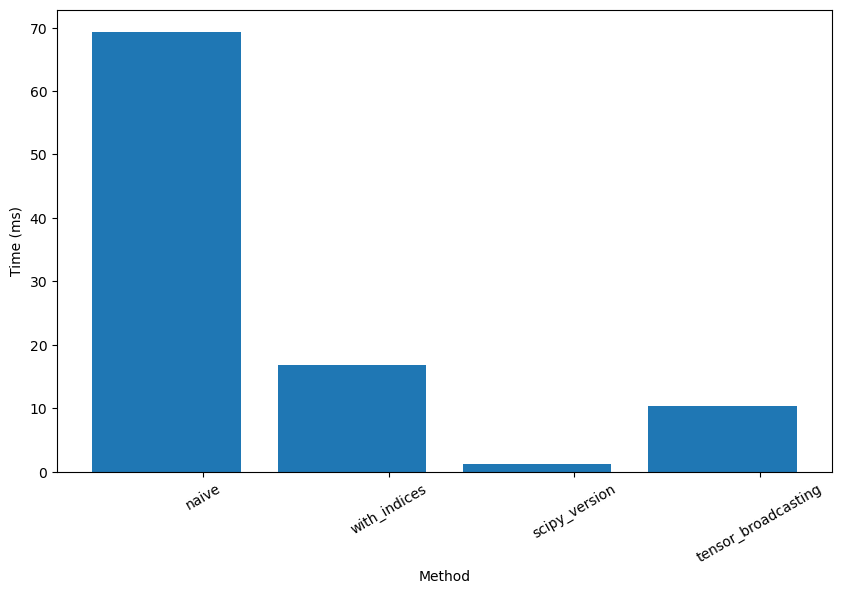

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(len(methods)), [r.best * 1000 for r in timers], log=False
)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods)) + 0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel("Method")
plt.ylabel("Time (ms)")
plt.show()